In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FuncFormatter

In [10]:
start_date = '2021-03-22'
# end_date ='2021-08-28'

start_date = pd.to_datetime(start_date) 
# end_date = pd.to_datetime(end_date)
end_date = start_date + pd.Timedelta(days=35)


In [11]:
target = '../Chanae-combined_files'
# sunny rainy winter
output_dir = '../Chanae-Graph/2021/sunny'

In [12]:
# sixfactor_dir = ['d2m','RH','temperature','rainfall','ws','uvb','durationOfDay','sevenFactor']
sixfactor_dir = ['sevenFactor']
for dir in sixfactor_dir:
    if not os.path.exists(os.path.join(output_dir,dir)):
        os.makedirs(os.path.join(output_dir,dir))

In [61]:
colors = {
    'd2m': 'deeppink',
    'RH': 'green',
    'minTemp': 'orange',
    'meanTemp': 'orangered',
    'maxTemp': 'darkred',
    'tp': 'blue',
    'WS': 'dodgerblue',
    'uvb': 'darkviolet',
    'duration_of_day': 'black',
}

for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    df = filtered_data

    # print(df.head(7))    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # คำนวณระยะเวลาของแต่ละวัน
    df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'d2m': 'mean', 
                                          'RH': 'mean', 
                                          'minTemp': 'min',
                                          'maxTemp': 'max',
                                          'meanTemp': 'mean',
                                          'tp': 'sum',
                                          'WS': 'mean',
                                          'uvb': 'mean',
                                          'duration_of_day': 'mean'
                                          })

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # แปลงระยะเวลาจากวินาทีเป็น ชั่วโมงและนาที
    df_resampled['duration_hours'] = df_resampled['duration_of_day'].dt.seconds // 3600
    df_resampled['duration_minutes'] = (df_resampled['duration_of_day'].dt.seconds % 3600) // 60

    # # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # พล็อตกราฟจุดน้ำค้าง
    plt.plot(df_resampled.index, df_resampled['d2m'], label='Dew Point (°C)', marker='s', color=colors['d2m'])
    plt.plot(df_resampled.index, df_resampled['RH']*100, label='RH (%)', marker='o', color=colors['RH'])
    plt.plot(df_resampled.index, df_resampled['minTemp'], label='minTemp (°C)', marker='s', color=colors['minTemp'])
    plt.plot(df_resampled.index, df_resampled['meanTemp'], label='meanTemp (°C)', marker='s', color=colors['meanTemp'])
    plt.plot(df_resampled.index, df_resampled['maxTemp'], label='maxTemp (°C)', marker='s', color=colors['maxTemp'])
    plt.plot(df_resampled.index, df_resampled['tp']*1000, label='Rainfall (mm)', marker='o', color=colors['tp'])
    plt.plot(df_resampled.index, df_resampled['WS'], label='WS (m/s)', marker='o', color=colors['WS'])
    # 0 -> /1000
    plt.plot(df_resampled.index, df_resampled['uvb']/1000, label='radiation (kJ/m^2) ', marker='o', color=colors['uvb'])
    plt.plot(df_resampled.index, df_resampled['duration_hours'] + df_resampled['duration_minutes'] / 60, label='duration_of_day (hours)', marker='o', color=colors['duration_of_day'])

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)


    # ปรับแต่งกราฟ
    plt.title('Seven Factor (7-day Interval)')
    plt.xlabel('Date')
    # ปรับตำแหน่ง label ให้ไม่บังกราฟ
    # plt.legend()
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(rotation=45)
    # plt.tight_layout()
    plt.grid(True)

    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[0], f'SevenFactor_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")


C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Chanae.png


C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Chang-Phueak.png


C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Du-Song-Yo.png


C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_8276\1248333778.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Phadung-Mat.png


### D2M

In [44]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    df = filtered_data

    # print(df.head(7))    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'d2m': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # # พล็อตกราฟจุดน้ำค้าง
    plt.plot(df_resampled.index, df_resampled['d2m'], label='Dew Point', marker='o')

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)


    # ปรับแต่งกราฟ
    plt.title('Dew Point Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('Dew Point (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[0], f'D2m_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")



Saved graph to ../Chanae-Graph/2021/winter\sevenFactor\D2m_Chanae.png
Saved graph to ../Chanae-Graph/2021/winter\sevenFactor\D2m_Chang-Phueak.png
Saved graph to ../Chanae-Graph/2021/winter\sevenFactor\D2m_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/winter\sevenFactor\D2m_Phadung-Mat.png


### RH

IndexError: list index out of range

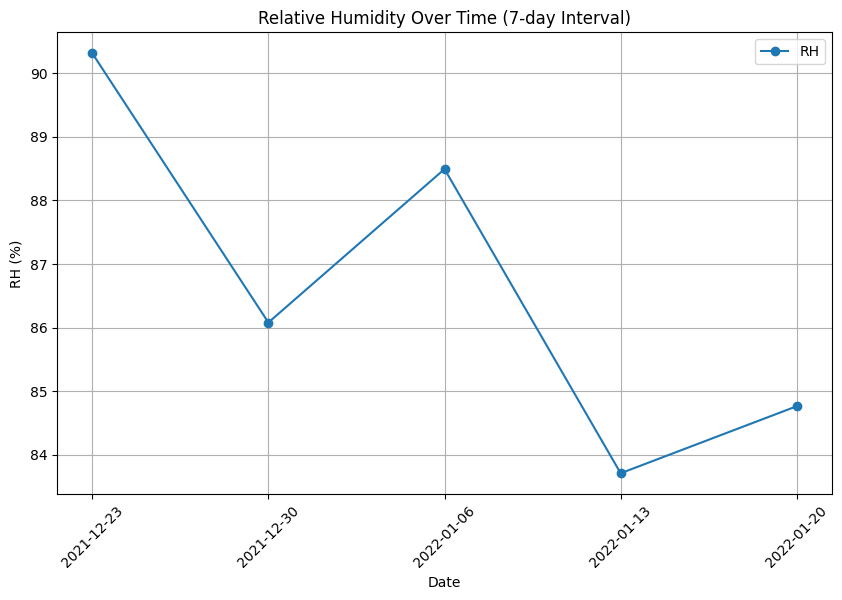

In [45]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    df = filtered_data
    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'RH': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # พล็อตกราฟความชื้น
    plt.plot(df_resampled.index, df_resampled['RH']*100, label='RH', marker='o')

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)

    # ปรับแต่งกราฟ
    plt.title('Relative Humidity Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('RH (%)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[1], f'RH_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")



### temperature

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df = filtered_data

    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

   # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'minTemp': 'min', 'maxTemp': 'max', 'meanTemp': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # พล็อตกราฟอุณหภูมิ
    plt.plot(df_resampled.index, df_resampled['minTemp'], label='minTemp', marker='o')
    plt.plot(df_resampled.index, df_resampled['meanTemp'], label='meanTemp', marker='o')
    plt.plot(df_resampled.index, df_resampled['maxTemp'], label='maxTemp', marker='o')

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)

    # ปรับแต่งกราฟ
    plt.title('Temperature Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('Temp (°C)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)

    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir, sixfactor_dir[2],f'Temperature_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()

    print(f"Saved graph to {output_file}")

Saved graph to ../Chanae-Graph/2021/sunny\temperature\Temperature_Chanae.png
Saved graph to ../Chanae-Graph/2021/sunny\temperature\Temperature_Chang-Phueak.png
Saved graph to ../Chanae-Graph/2021/sunny\temperature\Temperature_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\temperature\Temperature_Phadung-Mat.png


### rainfall

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # print(filtered_data.tail())
    df = filtered_data
    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'tp':'sum'}) 

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # Plot the graph
    plt.figure(figsize=(10, 6))

    plt.plot(df_resampled.index, df_resampled['tp']*1000, label='Rainfall', marker='o')

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)

    plt.title('Rainfall Over Time (7-day Interval)')  # Corrected title
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')  # Adjusted unit to millimeters
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir, sixfactor_dir[3],f'Rainfall_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")

Saved graph to ../Chanae-Graph/2021/sunny\rainfall\Rainfall_Chanae.png
Saved graph to ../Chanae-Graph/2021/sunny\rainfall\Rainfall_Chang-Phueak.png
Saved graph to ../Chanae-Graph/2021/sunny\rainfall\Rainfall_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\rainfall\Rainfall_Phadung-Mat.png


### WS

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # print(filtered_data.tail())
    df = filtered_data
    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'WS': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # พล็อตกราฟลม
    plt.plot(df_resampled.index, df_resampled['WS'], label='WS', marker='o')

    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)

    # ปรับแต่งกราฟ
    plt.title('Wind Speed Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('WS (m/s)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[4], f'Ws_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")
        

Saved graph to ../Chanae-Graph/2021/sunny\ws\Ws_Chanae.png
Saved graph to ../Chanae-Graph/2021/sunny\ws\Ws_Chang-Phueak.png
Saved graph to ../Chanae-Graph/2021/sunny\ws\Ws_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\ws\Ws_Phadung-Mat.png


### uvb

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # print(filtered_data.tail())
    df = filtered_data
    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # Convert 'uvb' column to numeric, coerce errors to NaN
    df['uvb'] = pd.to_numeric(df['uvb'], errors='coerce')

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'uvb': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))
    plt.plot(df_resampled.index, df_resampled['uvb'], label='radiation', marker='o')
    plt.xticks(df_resampled.index)

    # แสดงตัวเลขบนแต่ละ marker
    for i, value in enumerate(df_resampled['uvb']):
        plt.text(df_resampled.index[i], value, f'{value:.2f}', ha='left', va='bottom')

    # ปรับแต่งกราฟ
    plt.title('Radiation Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('Radiation (J/m^2)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[5], f'Radiation_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")
        

Saved graph to ../Chanae-Graph/2021/sunny\uvb\Radiation_Chanae.png
Saved graph to ../Chanae-Graph/2021/sunny\uvb\Radiation_Chang-Phueak.png
Saved graph to ../Chanae-Graph/2021/sunny\uvb\Radiation_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\uvb\Radiation_Phadung-Mat.png


### durationOfDay

In [ ]:
def convert_to_time(value):
  hours = int(value)
  minutes = round((value - hours) * 60)
  return f"{hours}h{minutes}m"

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # print(filtered_data.tail())
    df = filtered_data

    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # คำนวณระยะเวลาของแต่ละวัน
    df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'duration_of_day': 'mean'})

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # แปลงระยะเวลาจากวินาทีเป็น ชั่วโมงและนาที
    df_resampled['duration_hours'] = df_resampled['duration_of_day'].dt.seconds // 3600
    df_resampled['duration_minutes'] = (df_resampled['duration_of_day'].dt.seconds % 3600) // 60

    # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # พล็อตกราฟ
    plt.figure(figsize=(10, 6))
    plt.plot(df_resampled.index, df_resampled['duration_hours'] + df_resampled['duration_minutes'] / 60, label='duration_of_day', marker='o')
    plt.xticks(df_resampled.index)

    # แสดงตัวเลขบนแต่ละ marker
    for i, (hours, minutes) in enumerate(zip(df_resampled['duration_hours'], df_resampled['duration_minutes'])):
        time_str = f'{int(hours)}h {int(minutes)}m'
        plt.text(df_resampled.index[i], hours + minutes / 60, time_str, ha='left', va='bottom')

    # ปรับแต่งกราฟ
    plt.title('Duration of Day Over Time (7-day Interval)')
    plt.xlabel('Date')
    plt.ylabel('Duration of Day')

    # กำหนดแกน y ให้แสดงเป็นรูปแบบ "11h48m"
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: convert_to_time(x)))

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[6], f'Duration_of_Day_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")

C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\durationOfDay\Duration_of_Day_Chanae.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\durationOfDay\Duration_of_Day_Chang-Phueak.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\durationOfDay\Duration_of_Day_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\durationOfDay\Duration_of_Day_Phadung-Mat.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\2200666518.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


### combination all together

In [ ]:
for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    df = filtered_data

    # print(df.head(7))    
    # แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
    df['date'] = pd.to_datetime(df['date'])

    # กำหนด 'date' เป็น index
    df.set_index('date', inplace=True)

    # คำนวณระยะเวลาของแต่ละวัน
    df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])

    # สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
    df_resampled = df.resample('7D').agg({'d2m': 'mean', 
                                          'RH': 'mean', 
                                          'minTemp': 'min',
                                          'maxTemp': 'max',
                                          'meanTemp': 'mean',
                                          'tp': 'sum',
                                          'WS': 'mean',
                                          'uvb': 'mean',
                                          'duration_of_day': 'mean'
                                          })

    # เลื่อน index ไป 7 วัน
    df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

    # # ตัดข้อมูลเฉพาะที่ต้องการแสดง
    end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
    df_resampled = df_resampled[df_resampled.index <= end_date]

    # แปลงระยะเวลาจากวินาทีเป็น ชั่วโมงและนาที
    df_resampled['duration_hours'] = df_resampled['duration_of_day'].dt.seconds // 3600
    df_resampled['duration_minutes'] = (df_resampled['duration_of_day'].dt.seconds % 3600) // 60

    # # พล็อตกราฟ
    plt.figure(figsize=(10, 6))

    # # พล็อตกราฟจุดน้ำค้าง
    plt.plot(df_resampled.index, df_resampled['d2m'], label='Dew Point (°C)', marker='o')
    plt.plot(df_resampled.index, df_resampled['RH']*100, label='RH (%)', marker='o')
    plt.plot(df_resampled.index, df_resampled['minTemp'], label='minTemp (°C)', marker='o')
    plt.plot(df_resampled.index, df_resampled['meanTemp'], label='meanTemp (°C)', marker='o')
    plt.plot(df_resampled.index, df_resampled['maxTemp'], label='maxTemp (°C)', marker='o')
    plt.plot(df_resampled.index, df_resampled['tp']*1000, label='Rainfall (mm)', marker='o')
    plt.plot(df_resampled.index, df_resampled['WS'], label='WS (m/s)', marker='o')
    # 0 -> /1000
    plt.plot(df_resampled.index, df_resampled['uvb']/1000, label='radiation (kJ/m^2) ', marker='o')
    plt.plot(df_resampled.index, df_resampled['duration_hours'] + df_resampled['duration_minutes'] / 60, label='duration_of_day (hours)', marker='o')



    # ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
    plt.xticks(df_resampled.index)


    # ปรับแต่งกราฟ
    plt.title('Seven Factor (7-day Interval)')
    plt.xlabel('Date')
    # ปรับตำแหน่ง label ให้ไม่บังกราฟ
    # plt.legend()
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(rotation=45)
    # plt.tight_layout()
    plt.grid(True)

    # บันทึกภาพเป็นไฟล์ PNG
    output_file = os.path.join(output_dir,sixfactor_dir[7], f'SevenFactor_{file.split(".")[0]}.png')
    plt.savefig(output_file, bbox_inches='tight')
    plt.close()
    
    print(f"Saved graph to {output_file}")


C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Chanae.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Chang-Phueak.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Du-Song-Yo.png
Saved graph to ../Chanae-Graph/2021/sunny\sevenFactor\SevenFactor_Phadung-Mat.png


C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_19428\3131685122.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
